In [4]:
%pip install --no-cache-dir --upgrade "openpyxl>=3.1.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 1.2 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.10
    Uninstalling openpyxl-3.0.10:
      Successfully uninstalled openpyxl-3.0.10
Note: you may need to restart the kernel to use updated packages.


In [38]:
%pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 352.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 9.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 10.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.1/447.1 kB 10.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.23.3
    Uninstalling huggingface-hub-0.23.3:
      Successfully uninstalled huggingface-hub-0.23.3
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 6.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 6.2 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12


In [2]:
import numpy as np, pandas as pd
import scipy, sklearn, pyarrow
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("scipy", scipy.__version__)
print("sklearn", sklearn.__version__)
print("pyarrow", pyarrow.__version__)

numpy 1.26.4
pandas 2.3.3
scipy 1.16.3
sklearn 1.8.0
pyarrow 22.0.0


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import transformers
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.utils.class_weight
import sklearn.metrics
#import shap
import xgboost as xgb
import sklearn.ensemble
import openai

In [15]:
data = pd.read_excel('Assignment_Data 1 (1) (1).xlsx')

In [ ]:
# You’ve been asked to help a clinical data team develop an AI assistant that:
# 1. Predicts whether a patient will be readmitted to hospital within 30 days
# 2. Extracts and categorises key information from free-text discharge notes.

# This assignment combines a binary classification problem with a lightweight NLP/LLM-
# based task, both based on the same dataset.

# Dataset
# Download the dataset:
# 👉 Assignment_Data.csv (attached )
# The dataset includes:
# - Structured features (age, gender, diagnosis code, medication type, etc.)
# - A binary label: readmitted_30_days (0 = No, 1 = Yes)
# - Free-text discharge notes for each patient
# Your Tasks
# 1. Predictive Modelling (Binary Classification)
# - Perform data cleaning and exploratory analysis
# - Apply feature engineering: e.g. convert categorical variables to numerical, handle
# imbalances, derive new features
# - Train a classification model (e.g. logistic regression, random forest, XGBoost)
# - Evaluate using ROC AUC, F1-score, and confusion matrix
# - Explain which features were most influential
# 2. Named Entity Recognition from Discharge Notes (LLM/NLP)
# - Use an open-source NLP or LLM model (e.g. SpaCy, Flan-T5, BART from Hugging Face) to
# extract clinical entities from discharge notes
# - Identify and label relevant medical terms: diagnosis, treatment, symptoms, medications, or
# follow-up actions
# - Optionally use prompt engineering to guide the LLM for consistent output

# - Briefly discuss risks such as hallucination, entity ambiguity, or limitations of general-
# purpose models in clinical contexts

# 1. Classification Model

## Exploratory Analysis

In [3]:
data
#categorical: gender, diagnosis_code, medication_type

,patient_id,age,gender,diagnosis_code,num_previous_admissions,medication_type,length_of_stay,readmitted_30_days,discharge_note
0,1,71,Male,D002,3,Type C,2,0,Good recovery trajectory. Follow-up scan sched...
1,2,34,Female,D002,1,Type B,3,1,Stable post-surgery. Advised to avoid physical...
2,3,80,Male,D002,2,Type C,5,1,Symptoms controlled. Monitoring for relapse ad...
3,4,40,Female,D002,2,Type C,11,0,Stable post-surgery. Advised to avoid physical...
4,5,43,Female,D001,1,Type C,8,1,Stable post-surgery. Advised to avoid physical...
...,...,...,...,...,...,...,...,...,...
195,196,50,Male,D001,6,Type A,8,0,Good recovery trajectory. Follow-up scan sched...
196,197,61,Female,D004,1,Type B,2,0,Patient discharged with minor discomfort. Advi...
197,198,26,Male,D002,0,Type C,8,0,Discharge after recovery from pneumonia. No co...
198,199,35,Female,D001,3,Type C,11,1,Blood pressure under control. Continue current...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               200 non-null    int64 
 1   age                      200 non-null    int64 
 2   gender                   200 non-null    object
 3   diagnosis_code           200 non-null    object
 4   num_previous_admissions  200 non-null    int64 
 5   medication_type          200 non-null    object
 6   length_of_stay           200 non-null    int64 
 7   readmitted_30_days       200 non-null    int64 
 8   discharge_note           200 non-null    object
dtypes: int64(5), object(4)
memory usage: 14.2+ KB


In [5]:
data.isna().sum()
#no nulls

patient_id                 0
age                        0
gender                     0
diagnosis_code             0
num_previous_admissions    0
medication_type            0
length_of_stay             0
readmitted_30_days         0
discharge_note             0
dtype: int64

In [15]:
data.readmitted_30_days.value_counts()
#its a bit imbalanced

readmitted_30_days
0    135
1     65
Name: count, dtype: int64

### Features

In [135]:
data.columns.tolist()

['patient_id',
 'age',
 'gender',
 'diagnosis_code',
 'num_previous_admissions',
 'medication_type',
 'length_of_stay',
 'readmitted_30_days',
 'discharge_note']

#### Numeric

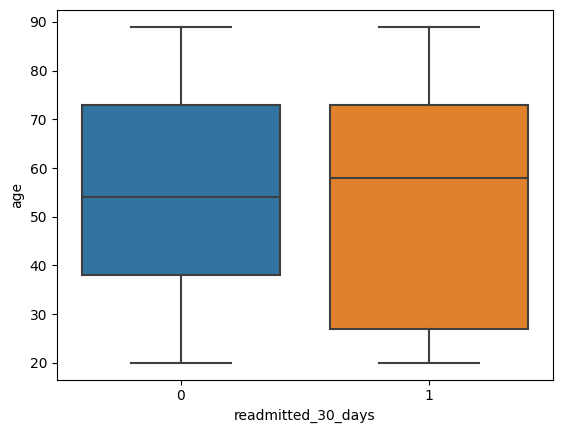

In [136]:
sns.boxplot(x=data.readmitted_30_days, y=data.age)
plt.show()

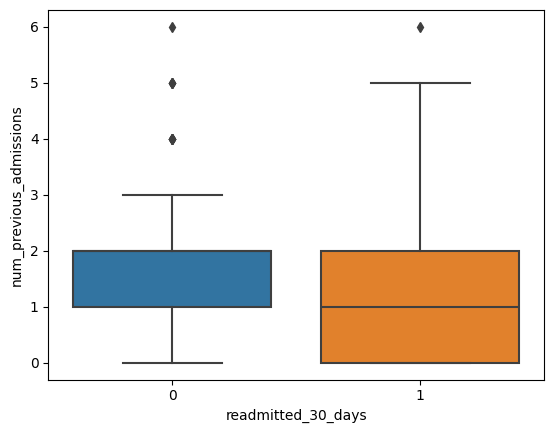

In [137]:
sns.boxplot(x=data.readmitted_30_days, y=data.num_previous_admissions)
plt.show()

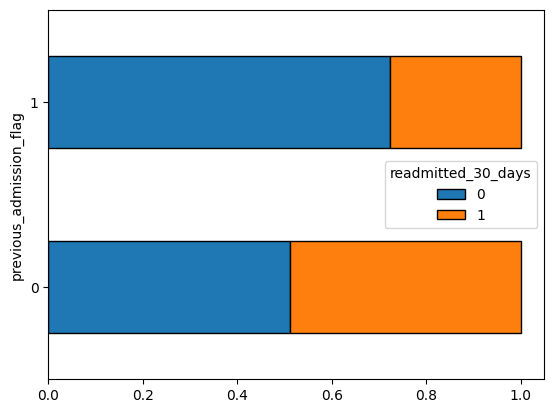

In [155]:
data['previous_admission_flag'] = data.num_previous_admissions.apply(lambda x: 1 if x > 0 else 0)
agg_df = (data.groupby(['previous_admission_flag'])['readmitted_30_days'].value_counts() / data.groupby(['previous_admission_flag']).size()).to_frame('percentage').reset_index()
agg_df = agg_df.pivot_table(index=['previous_admission_flag'],columns='readmitted_30_days',values='percentage',fill_value=0)

agg_df.plot.barh(stacked = True, edgecolor = 'black')
plt.show()

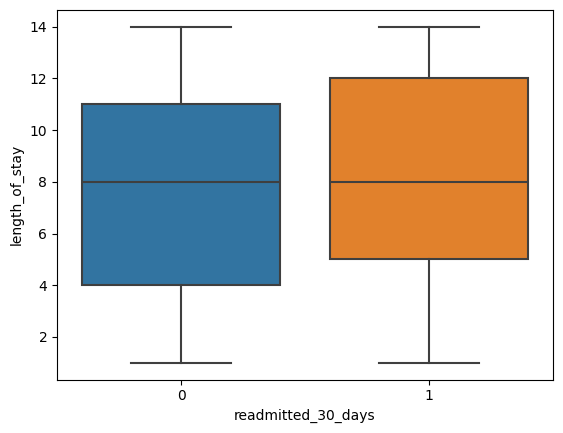

In [157]:
sns.boxplot(x=data.readmitted_30_days, y=data.length_of_stay)
plt.show()

#### Categorical

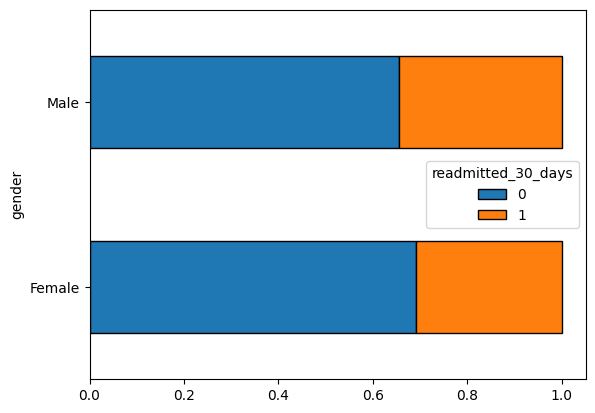

In [158]:
agg_df = (data.groupby(['gender'])['readmitted_30_days'].value_counts() / data.groupby(['gender']).size()).to_frame('percentage').reset_index()
agg_df = agg_df.pivot_table(index=['gender'],columns='readmitted_30_days',values='percentage',fill_value=0)

agg_df.plot.barh(stacked = True, edgecolor = 'black')
plt.show()

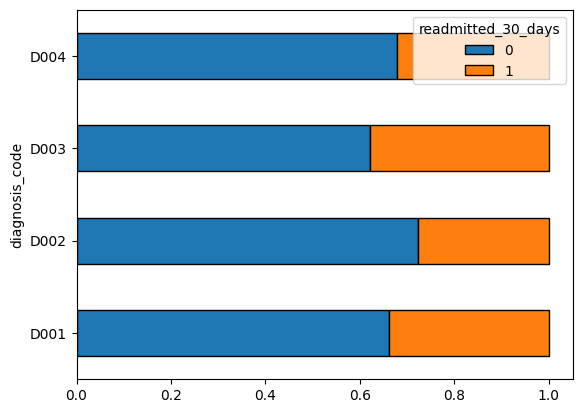

In [159]:
agg_df = (data.groupby(['diagnosis_code'])['readmitted_30_days'].value_counts() / data.groupby(['diagnosis_code']).size()).to_frame('percentage').reset_index()
agg_df = agg_df.pivot_table(index=['diagnosis_code'],columns='readmitted_30_days',values='percentage',fill_value=0)

agg_df.plot.barh(stacked = True, edgecolor = 'black')
plt.show()

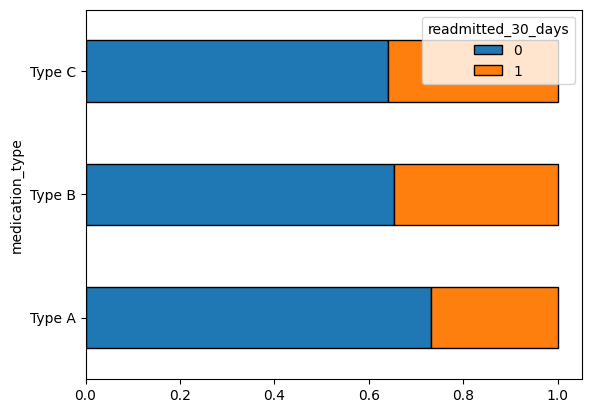

In [160]:
agg_df = (data.groupby(['medication_type'])['readmitted_30_days'].value_counts() / data.groupby(['medication_type']).size()).to_frame('percentage').reset_index()
agg_df = agg_df.pivot_table(index=['medication_type'],columns='readmitted_30_days',values='percentage',fill_value=0)

agg_df.plot.barh(stacked = True, edgecolor = 'black')
plt.show()

#### Text

In [180]:
for note in data[data.readmitted_30_days == 1].discharge_note.tolist():
    print(note)
#monitoring for relapse advised
#avoid physical exertion
#prescribed antibiotics
#rest and hydration
#continue current medication
#Recommend follow-up in 2 weeks

Stable post-surgery. Advised to avoid physical exertion.
Symptoms controlled. Monitoring for relapse advised.
Stable post-surgery. Advised to avoid physical exertion.
Good recovery trajectory. Follow-up scan scheduled next month.
Discharge after recovery from pneumonia. No complications observed.
Patient discharged in stable condition. Recommend follow-up in 2 weeks.
Patient discharged with minor discomfort. Advised rest and hydration.
Discharge after recovery from pneumonia. No complications observed.
Stable post-surgery. Advised to avoid physical exertion.
Discharge after recovery from pneumonia. No complications observed.
Mild reaction to medication. Switched to alternative treatment.
Patient showed improvement. Prescribed antibiotics for 5 days.
Patient showed improvement. Prescribed antibiotics for 5 days.
Good recovery trajectory. Follow-up scan scheduled next month.
Good recovery trajectory. Follow-up scan scheduled next month.
Mild reaction to medication. Switched to alternativ

In [181]:
for note in data[data.readmitted_30_days == 0].discharge_note.tolist():
    print(note)
#overlap in discharge notes between positive and negative examples
    
#"stable"
#"pneumonia"
#"good recovery trajectory"

Good recovery trajectory. Follow-up scan scheduled next month.
Stable post-surgery. Advised to avoid physical exertion.
Patient showed improvement. Prescribed antibiotics for 5 days.
Blood pressure under control. Continue current medication.
Stable post-surgery. Advised to avoid physical exertion.
Symptoms controlled. Monitoring for relapse advised.
Discharge after recovery from pneumonia. No complications observed.
Stable post-surgery. Advised to avoid physical exertion.
No further signs of infection. Resume normal diet and activity.
Patient discharged with minor discomfort. Advised rest and hydration.
Patient discharged with minor discomfort. Advised rest and hydration.
No further signs of infection. Resume normal diet and activity.
Patient showed improvement. Prescribed antibiotics for 5 days.
Discharge after recovery from pneumonia. No complications observed.
Symptoms controlled. Monitoring for relapse advised.
Patient discharged in stable condition. Recommend follow-up in 2 weeks.

In [81]:
data['no_complications_flag'] = data.discharge_note.str.contains('no complications', case=False).apply(int)
data['good_recovery_traj_flag'] = data.discharge_note.str.contains('good recovery trajectory', case=False).apply(int)
data['follow_up_flag'] = data.discharge_note.str.contains('follow-up', case=False).apply(int)
data['prescribed_antibiotics_flag'] = data.discharge_note.str.contains('prescribed antibiotics', case=False).apply(int)
data['monitoring_flag'] = data.discharge_note.str.contains('monitoring for relapse advised', case=False).apply(int)
data['avoid_physical_exertion_flag'] = data.discharge_note.str.contains('avoid physical exertion', case=False).apply(int)
data['pneumonia_flag'] = data.discharge_note.str.contains('pneumonia', case=False).apply(int)


In [74]:
data.groupby('readmitted_30_days').no_complications_flag.value_counts()

readmitted_30_days  no_complications_flag
0                   0                        119
                    1                         16
1                   0                         56
                    1                          9
Name: count, dtype: int64

In [76]:
data.groupby('readmitted_30_days').monitoring_flag.value_counts()

readmitted_30_days  monitoring_flag
0                   0                  123
                    1                   12
1                   0                   54
                    1                   11
Name: count, dtype: int64

In [80]:
data.groupby('readmitted_30_days').follow_up_flag.value_counts()

readmitted_30_days  follow_up_flag
0                   0                 104
                    1                  31
1                   0                  54
                    1                  11
Name: count, dtype: int64

In [82]:
data.groupby('readmitted_30_days').pneumonia_flag.value_counts()

readmitted_30_days  pneumonia_flag
0                   0                 119
                    1                  16
1                   0                  56
                    1                   9
Name: count, dtype: int64

## Modeling

In [83]:
X = data[['age', 'gender', 'diagnosis_code', 'num_previous_admissions', 'medication_type', 'length_of_stay', 'discharge_note']]#num_previous_admissions
#X = data[['age', 'gender', 'diagnosis_code', 'num_previous_admissions', 'medication_type', 'length_of_stay', 'no_complications_flag', 'good_recovery_traj_flag', 'follow_up_2_wk_flag', 'prescribed_antibiotics_flag', 'monitoring_flag']]
#X = data[['previous_admission_flag', 'diagnosis_code', 'medication_type', 'discharge_note']]
y = data['readmitted_30_days']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.8, random_state=100)

In [101]:
def embed(texts):
    embedder = transformers.pipeline("feature-extraction", model="BAAI/bge-base-en-v1.5")#, model="Qwen/Qwen3-Embedding-0.6B"
    texts = np.asarray(texts).ravel().tolist()
    outputs = embedder(texts)
    return np.vstack([np.mean(o[0], axis=0) for o in outputs])

categorical_cols = ['gender', 'diagnosis_code', 'medication_type']# 'gender',
cat_pipe = sklearn.pipeline.Pipeline([("encoder", sklearn.preprocessing.OneHotEncoder())])

#text_preprocessor = sklearn.preprocessing.FunctionTransformer([("text", embed, "discharge_note")])
text_pipe = sklearn.pipeline.Pipeline([("embedder", sklearn.preprocessing.FunctionTransformer(embed)), ("dim_reduce", sklearn.decomposition.PCA(n_components=10))])#

preprocessor = sklearn.compose.ColumnTransformer([("cat", cat_pipe, categorical_cols), ("text", text_pipe, ["discharge_note"])], remainder='passthrough')#

#model = sklearn.pipeline.Pipeline([("preprocess", preprocessor),("clf", xgb.XGBClassifier(max_depth=3, n_estimators=10, reg_lambda=1, reg_alpha=2))])
model = sklearn.pipeline.Pipeline([("preprocess", preprocessor), ("clf", sklearn.ensemble.RandomForestClassifier(max_depth=3, n_estimators=10))])
train_sample_weight = sklearn.utils.class_weight.compute_sample_weight(class_weight='balanced',y=y_train)

model.fit(X_train, y_train, **{'clf__sample_weight': train_sample_weight})

Device set to use mps:0


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('text', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformer

In [220]:
#import json
#json.loads(model.named_steps["clf"].get_booster().save_config())
# model.named_steps["clf"].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Performance

In [102]:
print('Train ROC AUC: ', sklearn.metrics.roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
print('Test ROC AUC: ', sklearn.metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Device set to use mps:0


Train ROC AUC:  0.8088727678571427


Device set to use mps:0


Test ROC AUC:  0.5601023017902813


In [103]:
print('Train F1 Score: ', sklearn.metrics.f1_score(y_train, model.predict(X_train)))
print('Test F1 Score: ', sklearn.metrics.f1_score(y_test, model.predict(X_test)))

Device set to use mps:0


Train F1 Score:  0.6548672566371682


Device set to use mps:0


Test F1 Score:  0.5


In [107]:
print('Train Recall Score: ', sklearn.metrics.recall_score(y_train, model.predict(X_train)))
print('Test Recall Score: ', sklearn.metrics.recall_score(y_test, model.predict(X_test)))

Device set to use mps:0


Train Recall Score:  0.7708333333333334


Device set to use mps:0


Test Recall Score:  0.47058823529411764


In [104]:
sklearn.metrics.confusion_matrix(y_test, model.predict(X_test))

Device set to use mps:0


array([[16,  7],
       [ 9,  8]])

### Feature Importance

In [ ]:
# explainer = shap.explainers.KernelExplainer(model.predict_proba, X_train)
# shap_values = explainer(X_train)[:,1]
# shap.plots.bar(shap_values)

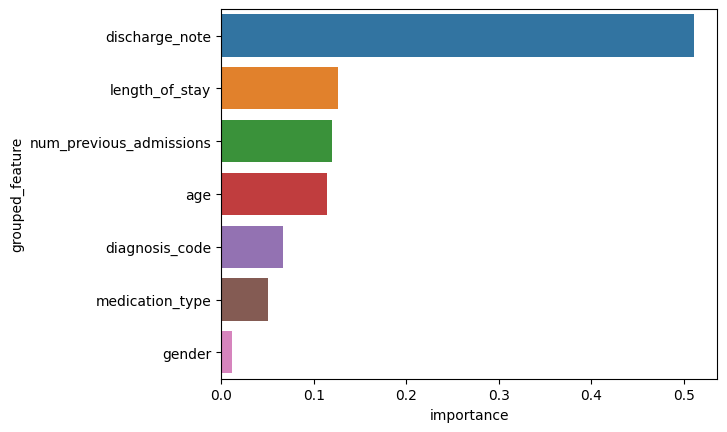

In [106]:
feat = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_cols).tolist() + ['emb_pca_dim_' + str(i+1) for i in range(10)] + ['age', 'num_previous_admissions', 'length_of_stay']
imp_feat_df = pd.DataFrame({'feature':feat, 'importance':model.named_steps['clf'].feature_importances_})
imp_feat_df['grouped_feature'] =  imp_feat_df.feature.apply(lambda x: 'gender' if 'gender' in x else 'diagnosis_code' if 'diagnosis_code' in x else 'medication_type' if 'medication_type' in x else 'discharge_note' if 'emb_pca_dim' in x else x)
grouped_imp_feat_df = imp_feat_df.groupby('grouped_feature').importance.sum().to_frame().reset_index()
grouped_imp_feat_df.sort_values(by='importance', ascending=False, inplace=True)

# sns.barplot(y=feat, x=model.named_steps['clf'].feature_importances_, orient='h')
sns.barplot(y=grouped_imp_feat_df.grouped_feature, x=grouped_imp_feat_df.importance, orient='h')
plt.show()

# 2. Named Entity Recognition

In [111]:
def extract_entities(note):
    
    prompt = f"""
You are a text extraction specialist. Your job is to review the medical notes below and determine the following:
- medical diagnosis
- medical treatment
- symptoms
- medications
- follow-up actions

If one of the attributes is not explicitly referenced in the text, you MUST return "Unknown".

You MUST return your response in the following JSON:
{{
diagnosis: str
treatment: str
symptoms: str
medications: str
follow-ups: str
}}

DO NOT include any additional information in your response outside of the JSON formatted as above.

Note: {note}
    """
    
    client = openai.OpenAI(
        base_url="https://router.huggingface.co/v1",
        api_key=os.environ["HF_TOKEN"],
    )

    completion = client.chat.completions.create(
        model="meta-llama/Llama-3.1-8B-Instruct:novita",
        messages=[
                {
                    "role": "user",
                    "content": prompt
                }
            ]#,
        #max_tokens=100
    )
    
    return completion.choices[0].message
    

In [112]:
data['discharge_note_entities'] = data.discharge_note.apply(extract_entities)

In [113]:
import json

def safe_json_loads(x):
    try:
        return json.loads(x)
    except (TypeError, json.JSONDecodeError):
        return np.nan

data['discharge_note_entities_json'] = data.discharge_note_entities.apply(lambda x: safe_json_loads(x.content))

In [114]:
data_ner = pd.concat((data, pd.json_normalize(data.discharge_note_entities_json)), axis=1)

In [115]:
data_ner.discharge_note_entities_json

0      {'diagnosis': 'Unknown', 'treatment': 'Unknown...
1      {'diagnosis': 'Unknown', 'treatment': 'Post-su...
2      {'diagnosis': 'Unknown', 'treatment': 'Unknown...
3      {'diagnosis': 'Unknown', 'treatment': 'Post-su...
4      {'diagnosis': 'Unknown', 'treatment': 'Unknown...
                             ...                        
195    {'diagnosis': 'Unknown', 'treatment': 'Unknown...
196    {'diagnosis': 'Unknown', 'treatment': 'Rest an...
197    {'diagnosis': 'Pneumonia', 'treatment': 'Unkno...
198    {'diagnosis': 'Unknown', 'treatment': 'Continu...
199    {'diagnosis': 'Unknown', 'treatment': 'prescri...
Name: discharge_note_entities_json, Length: 200, dtype: object

In [116]:
data_ner.discharge_note_entities_json.isna().sum()

0

In [117]:
data_ner.diagnosis = data_ner.diagnosis.str.lower()
data_ner.treatment = data_ner.treatment.str.lower()
data_ner.symptoms = data_ner.symptoms.str.lower()
data_ner.medications = data_ner.medications.str.lower()
data_ner['follow-ups'] = data_ner['follow-ups'].str.lower()

In [118]:
data_ner

,patient_id,age,gender,diagnosis_code,num_previous_admissions,medication_type,length_of_stay,readmitted_30_days,discharge_note,discharge_note_entities,...,prescribed_antibiotics_flag,monitoring_flag,avoid_physical_exertion_flag,follow_up_flag,pneumonia_flag,diagnosis,treatment,symptoms,medications,follow-ups
0,1,71,Male,D002,3,Type C,2,0,Good recovery trajectory. Follow-up scan sched...,"ChatCompletionMessage(content='{\n""diagnosis"":...",...,0,0,0,1,0,unknown,unknown,unknown,unknown,follow-up scan scheduled next month
1,2,34,Female,D002,1,Type B,3,1,Stable post-surgery. Advised to avoid physical...,"ChatCompletionMessage(content='{\n ""diagnosis...",...,0,0,1,0,0,unknown,post-surgery,unknown,unknown,unknown
2,3,80,Male,D002,2,Type C,5,1,Symptoms controlled. Monitoring for relapse ad...,"ChatCompletionMessage(content='{\n""diagnosis"":...",...,0,1,0,0,0,unknown,unknown,controlled,unknown,monitoring for relapse advised
3,4,40,Female,D002,2,Type C,11,0,Stable post-surgery. Advised to avoid physical...,"ChatCompletionMessage(content='{\n ""diagnos...",...,0,0,1,0,0,unknown,post-surgery,unknown,unknown,physical examination to ensure stable condition
4,5,43,Female,D001,1,Type C,8,1,Stable post-surgery. Advised to avoid physical...,"ChatCompletionMessage(content='{\n ""diagnosis...",...,0,0,1,0,0,unknown,unknown,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,50,Male,D001,6,Type A,8,0,Good recovery trajectory. Follow-up scan sched...,"ChatCompletionMessage(content='{\n""diagnosis"":...",...,0,0,0,1,0,unknown,unknown,unknown,unknown,follow-up scan scheduled next month
196,197,61,Female,D004,1,Type B,2,0,Patient discharged with minor discomfort. Advi...,"ChatCompletionMessage(content='{\n""diagnosis"":...",...,0,0,0,0,0,unknown,rest and hydration,minor discomfort,unknown,unknown
197,198,26,Male,D002,0,Type C,8,0,Discharge after recovery from pneumonia. No co...,"ChatCompletionMessage(content='{\n ""diagnosis...",...,0,0,0,0,1,pneumonia,unknown,unknown,unknown,discharge after recovery
198,199,35,Female,D001,3,Type C,11,1,Blood pressure under control. Continue current...,"ChatCompletionMessage(content='{\n""diagnosis"":...",...,0,0,0,0,0,unknown,continue current medication,unknown,unknown,unknown


In [119]:
data_ner.diagnosis.value_counts()

diagnosis
unknown                 174
pneumonia                25
infection (resolved)      1
Name: count, dtype: int64

In [120]:
data_ner.treatment.value_counts()

treatment
unknown                                                      99
continue current medication                                  19
rest and hydration                                           18
resume normal diet and activity                              18
alternative treatment                                        15
antibiotics for 5 days                                       10
post-surgery                                                  7
prescribed antibiotics                                        4
post-surgery care                                             3
prescribed antibiotics for 5 days                             2
current medication                                            2
discharge after recovery                                      1
surgery                                                       1
alternative treatment after a mild reaction to medication     1
Name: count, dtype: int64

In [121]:
data_ner.symptoms.value_counts()
# inconsistency:
# controlled, with a risk of relapse      
# controlled, with risk of relapse        

symptoms
unknown                               149
minor discomfort                       18
controlled                             16
mild reaction to medication            12
controlled, with a risk of relapse      1
controlled, with risk of relapse        1
symptoms controlled                     1
infection                               1
blood pressure                          1
Name: count, dtype: int64

In [122]:
data_ner.medications.value_counts()

medications
unknown                                                  172
antibiotics                                               16
current medication                                         7
current medication (type unknown)                          2
alternative treatment (replaced due to mild reaction)      1
medication with a mild reaction                            1
continue current medication                                1
Name: count, dtype: int64

In [123]:
data_ner['follow-ups'].value_counts()

follow-ups
unknown                                                                    113
monitoring for relapse advised                                              20
follow-up scan scheduled next month                                         18
patient discharged in stable condition. recommend follow-up in 2 weeks.      7
follow-up in 2 weeks                                                         6
switched to alternative treatment                                            5
recommend follow-up in 2 weeks                                               4
discharged in stable condition. recommend follow-up in 2 weeks.              4
continue current medication                                                  3
avoid physical exertion                                                      2
blood pressure under control. continue current medication                    2
5 days                                                                       2
discharged in stable condition, follow-up

In [124]:
data_ner.to_excel('Assignment_Data 1 (1) (1)_NER.xlsx')